In [13]:
import numpy as np
from numpy.linalg import cholesky, inv
import statsmodels.api as sm
import matplotlib.pyplot as plt

Vil se litt på GLS med kjent kovariansmatrise til feilledd

In [72]:
N = 100
x = np.random.uniform(size=N)
X = np.c_[np.ones(N),x]

Ω = np.eye(N)*x
Ψ = cholesky(inv(Ω))

u = np.random.multivariate_normal(np.zeros(N), Ω)
y = x+u

In [73]:
b_ols = sm.OLS(y,X).fit().params
b_gls = sm.OLS(Ψ@y,Ψ@X).fit().params

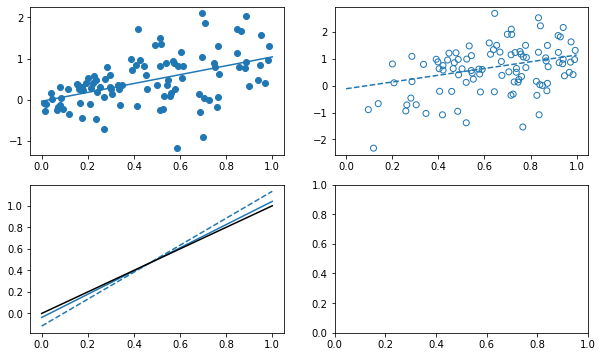

In [74]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
axes = axes.flatten()
x_grid = np.linspace(0,1)

axes[0].scatter(x,y)
axes[0].plot(x_grid, b_ols[0]+b_ols[1]*x_grid)

axes[1].scatter(Ψ@x,Ψ@y,facecolor='none', edgecolor='tab:blue')
axes[1].plot(x_grid, b_gls[0]+b_gls[1]*x_grid, linestyle='dashed')

axes[2].plot(x_grid, b_ols[0]+b_ols[1]*x_grid)
axes[2].plot(x_grid, b_gls[0]+b_gls[1]*x_grid, linestyle='dashed', color='tab:blue')
axes[2].plot(x_grid, x_grid, c='black')

hmm..